In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [5]:
df = pd.read_csv("rock_density_xray.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [7]:
df.columns = ['signal', 'density']

<Axes: xlabel='signal', ylabel='density'>

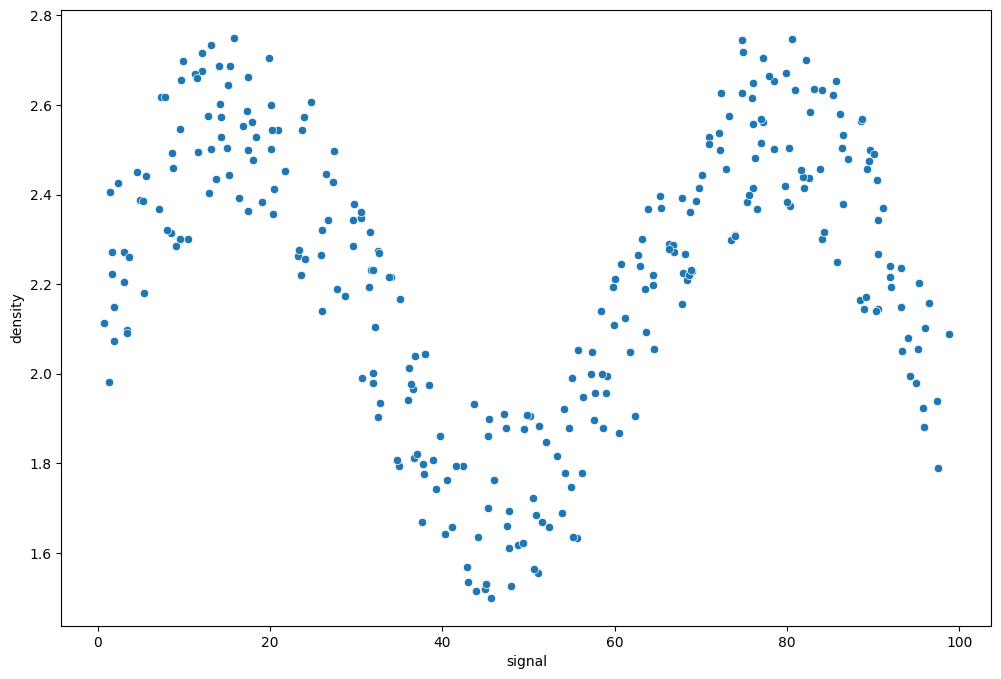

In [8]:
plt.figure(figsize= (12,8))
sns.scatterplot(x='signal', y= 'density', data= df)


In [9]:
x= df['signal'].values.reshape(-1, 1)
y= df['density']

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.15, random_state= 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train

array([[25.99751685],
       [74.94321595],
       [47.46075748],
       [20.11793737],
       [53.29269434],
       [11.69927445],
       [70.97721648],
       [80.03936215],
       [84.27712335],
       [68.94205562],
       [68.62225319],
       [59.00795312],
       [45.34247827],
       [51.14752453],
       [93.39407915],
       [23.21207789],
       [50.51324968],
       [12.96409209],
       [64.42480217],
       [76.03302052],
       [29.69675086],
       [90.52204588],
       [95.89619979],
       [ 3.08215991],
       [95.30880515],
       [37.89415205],
       [30.72578622],
       [ 4.56076991],
       [40.29631043],
       [67.88305288],
       [77.00233064],
       [24.81782725],
       [87.11476768],
       [32.01631598],
       [73.49644582],
       [39.31276208],
       [16.86506885],
       [51.19161607],
       [66.36433682],
       [88.68478065],
       [93.23308753],
       [76.96470453],
       [90.60395407],
       [95.27151287],
       [74.02752794],
       [82

In [11]:
def models(m, xtrain, ytrain, xtest, ytest):
  m.fit(xtrain, ytrain)
  pred= m.predict(xtest)
  rmse= root_mean_squared_error(ytest, pred)
  print(rmse)
  test_signal= np.arange(0, 100)
  outputs= m.predict(test_signal.reshape(-1, 1))
  plt.figure(figsize= (12,8))
  sns.scatterplot(x='signal', y= 'density', data= df)
  plt.plot(test_signal, outputs)



0.2789327760701736


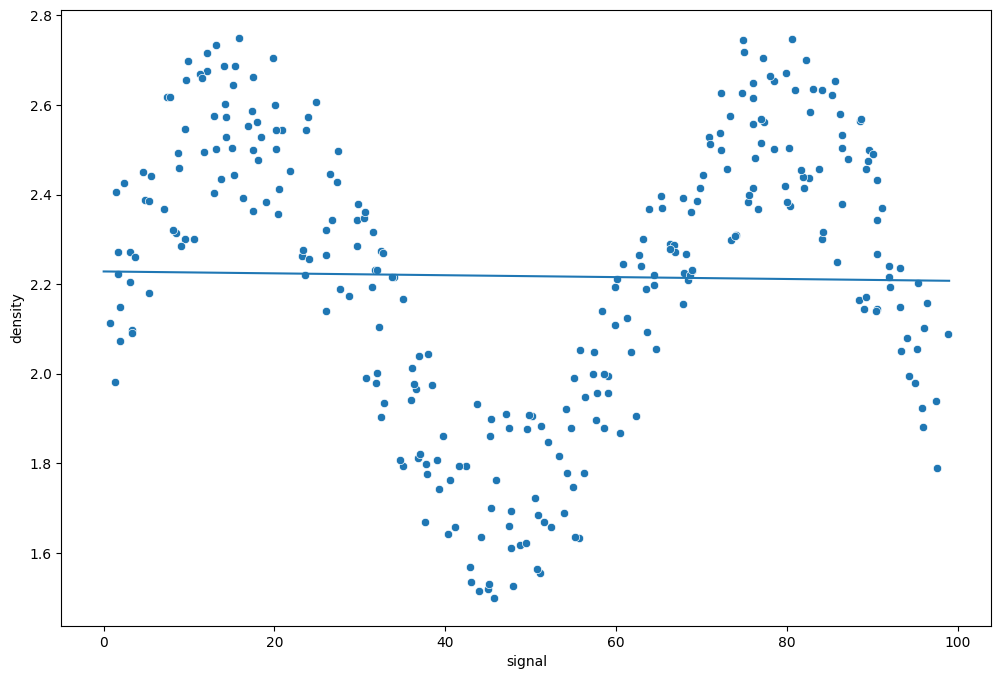

In [12]:
models(LinearRegression(), x_train, y_train, x_test, y_test)

0.16520828197645798
0.14516199020256743
0.13500627931123657
0.1827632275216948


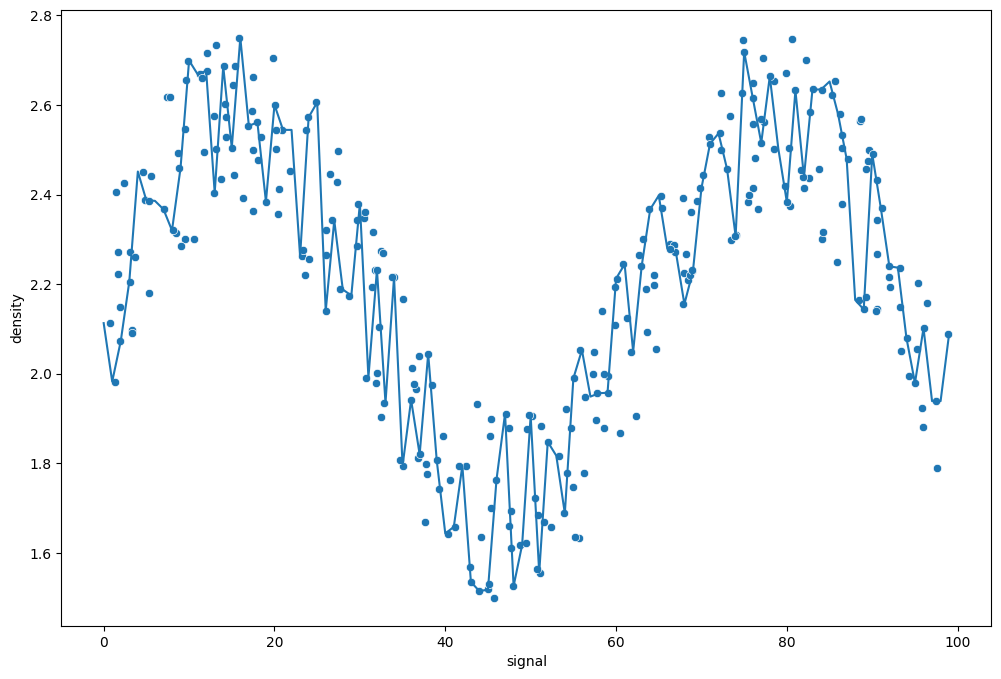

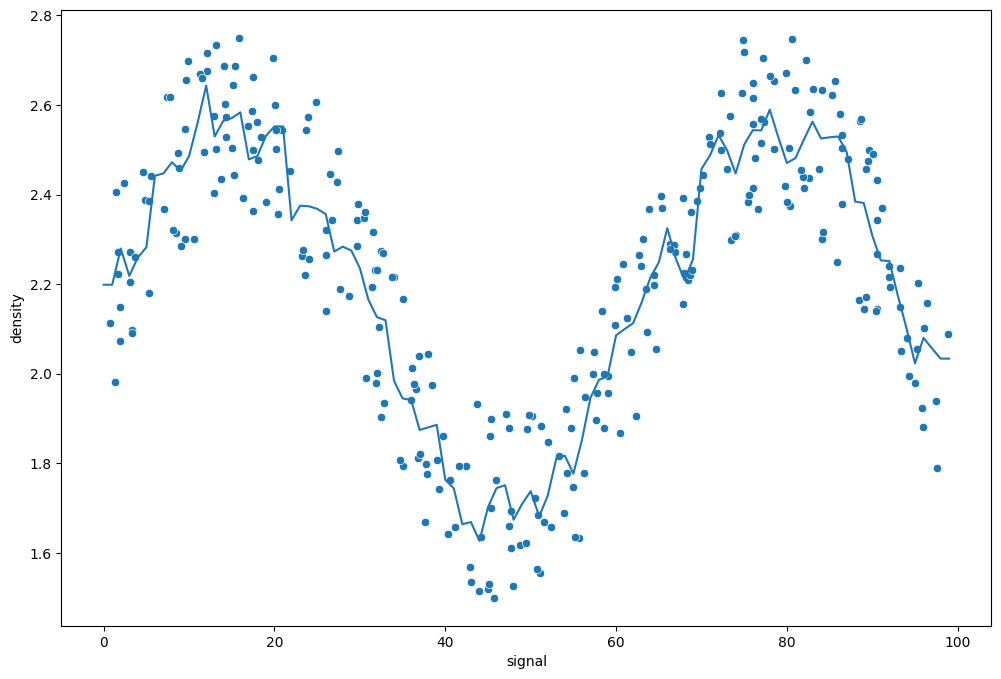

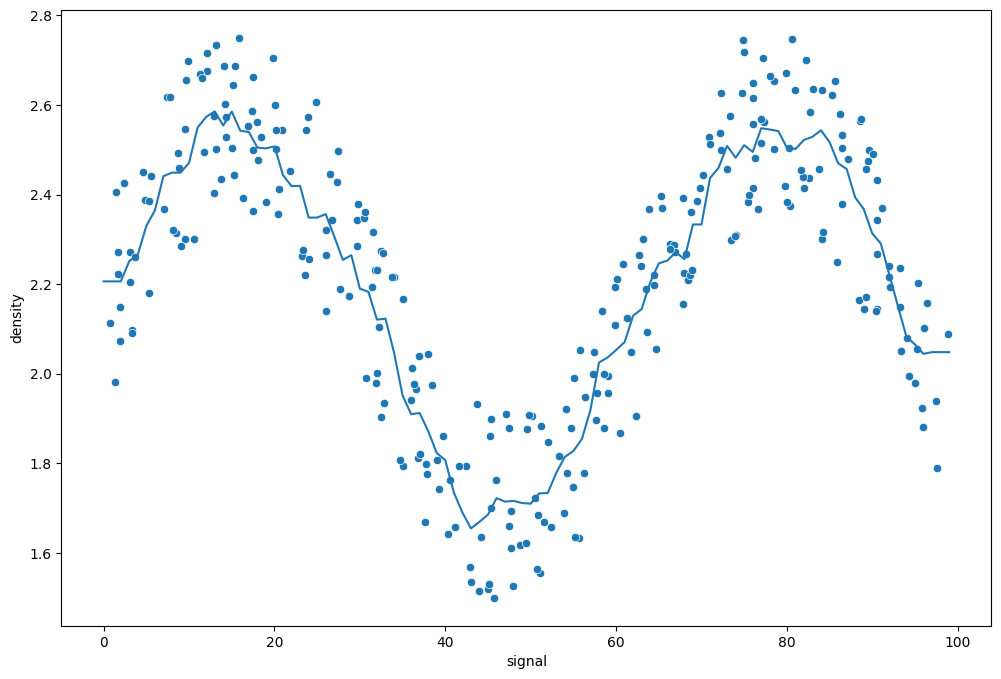

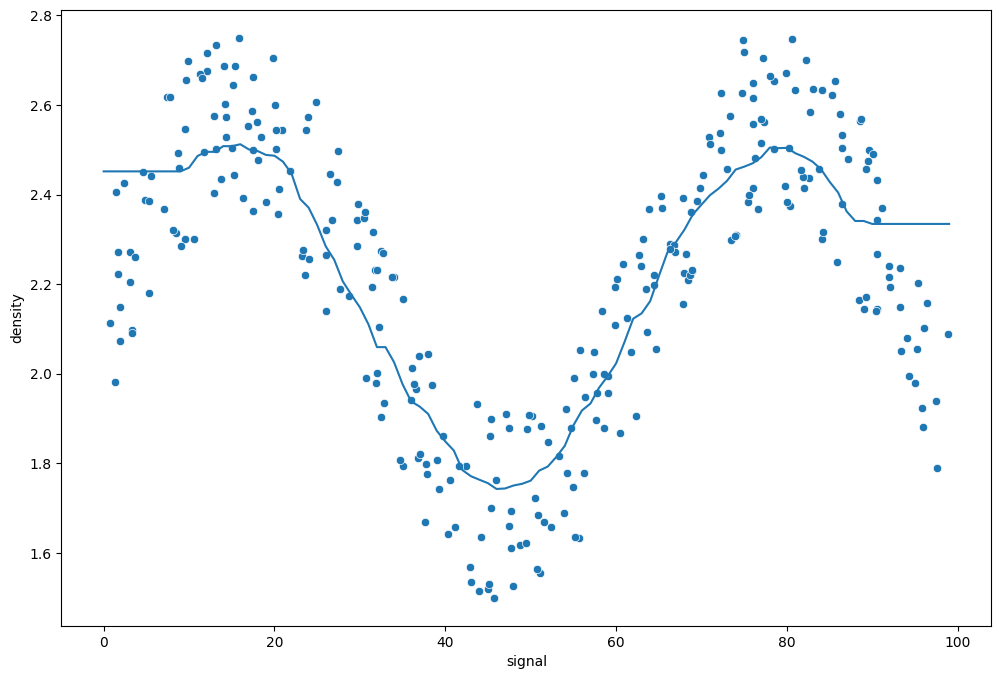

In [13]:
k= [1, 5, 10, 50]
for i in k:
  model_k= KNeighborsRegressor(n_neighbors= i)
  models(model_k, x_train, y_train, x_test, y_test)


0.1532535995251524
0.14786502633544538
0.1505219163280008
0.149907601177765
0.14644564107666563


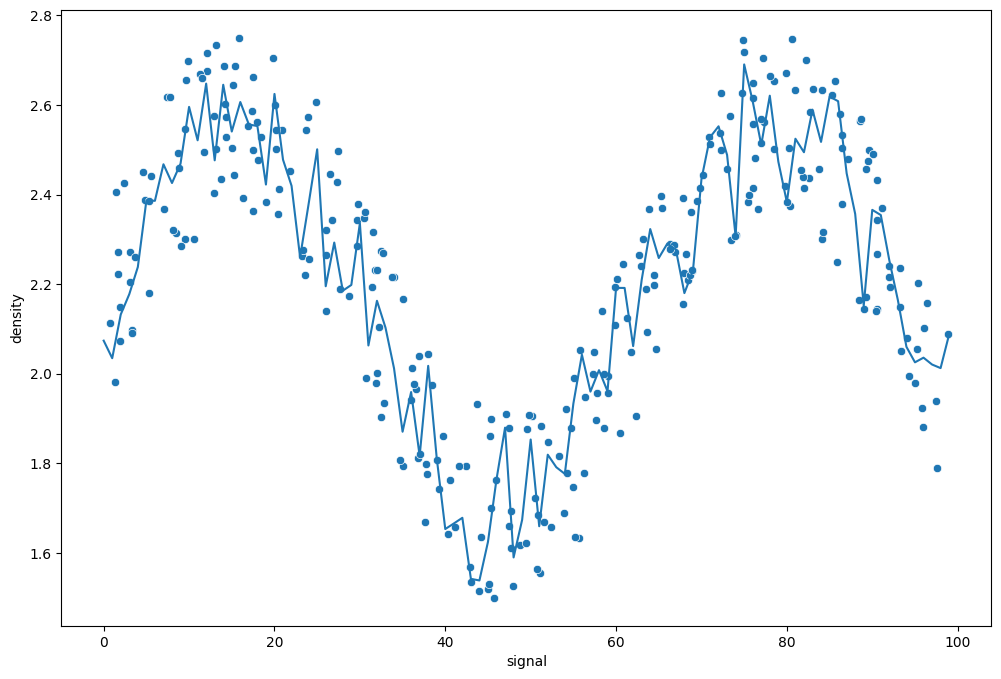

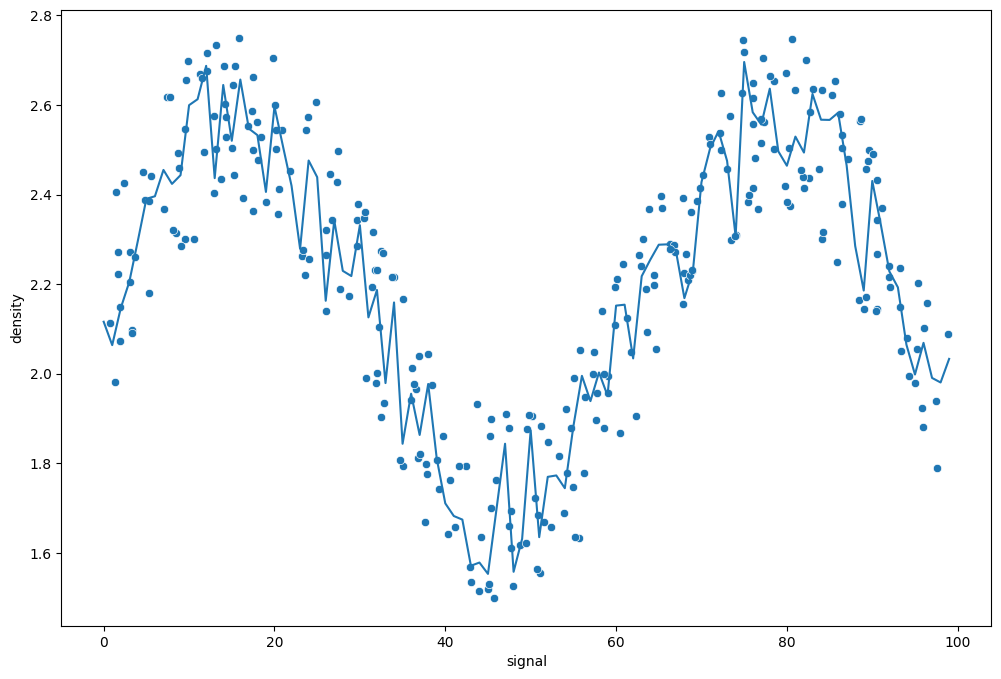

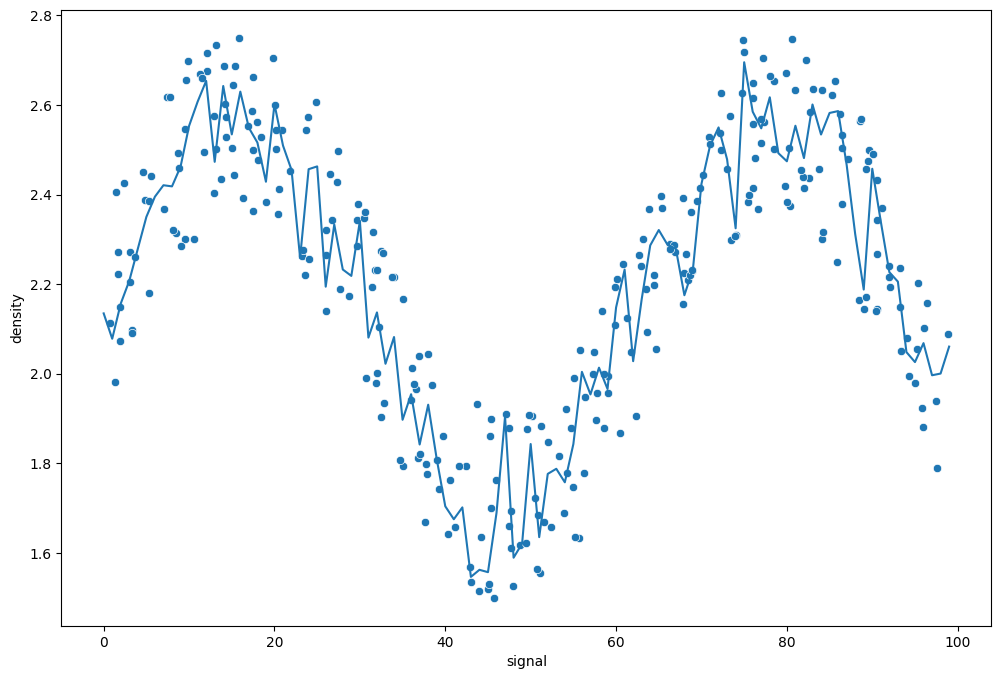

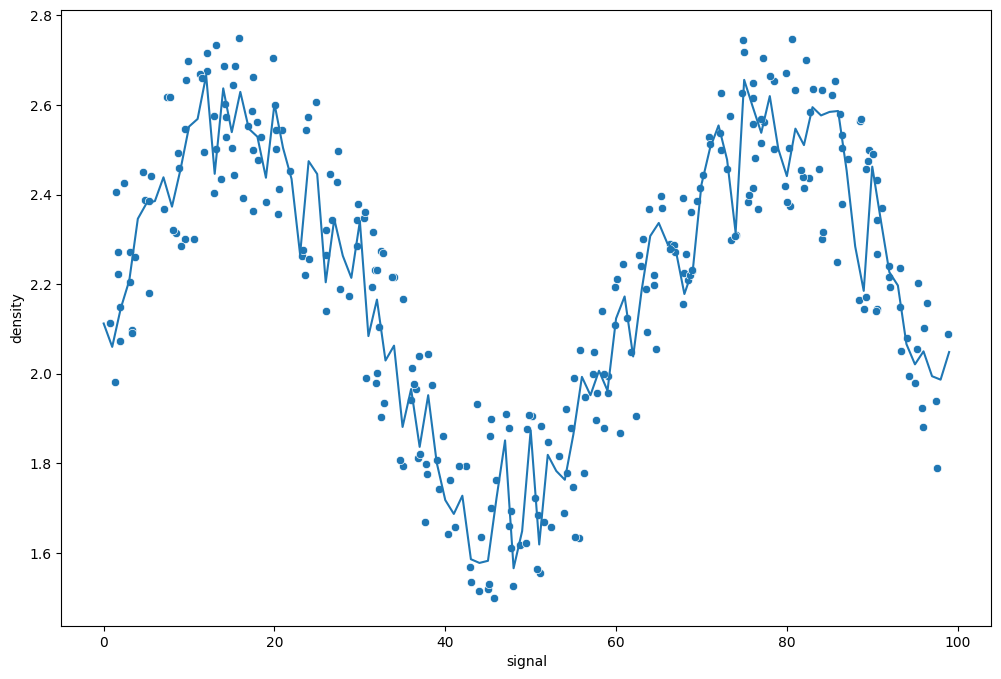

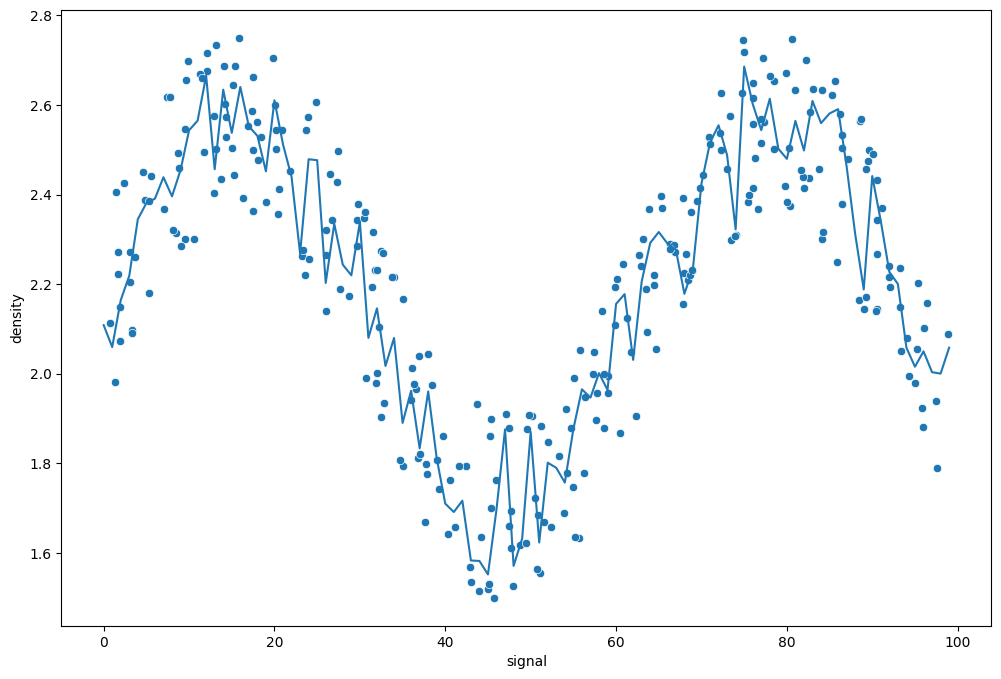

In [14]:
t= [10, 20, 30, 100, 200]
for i in t:
  model_t= RandomForestRegressor(n_estimators= i)
  models(model_t, x_train, y_train, x_test, y_test)

0.13928637299823227


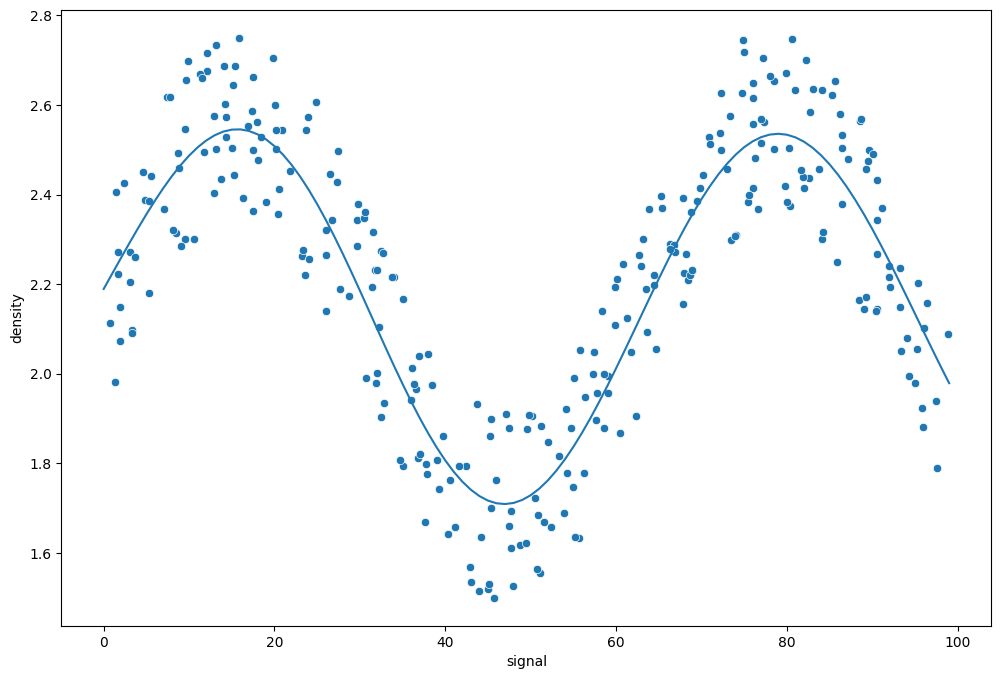

In [15]:
models(SVR(), x_train, y_train, x_test, y_test)